In [1]:
from pymol import cmd, finish_launching
finish_launching()

In [2]:
# obj_name = cmd.fetch('1HM5')
cmd.load('1HM5.pse')

In [3]:
from gcszhn_plugin import __init_plugin__
from gcszhn_plugin.pdb import *
import matplotlib.pyplot as plt
__init_plugin__()

In [4]:
cmd.set('ray_opaque_background', 'off')

In [13]:
cmd.extract('water', 'resn HOH')

In [6]:
def plot_hist(name, selection='(all)', minimum=None, maximum=None):
    if minimum is None:
        minimum = -float('inf')
    if maximum is None:
        maximum = float('inf')
    bfactors = [min(maximum, max(minimum, atom.b)) for atom in cmd.get_model(selection).atom]
    print("Minimum: %f, Maximum: %f" % (min(bfactors), max(bfactors)))
    plt.hist(bfactors, bins=100)
    plt.xlabel(name)
    plt.ylabel('frequency')
    plt.show()


def bfactors(selection='(all)')->list:
    return [atom.b for atom in cmd.get_model(selection).atom]


def show_only(selection='(all)'):
    cmd.hide(selection='(all)')
    cmd.show(selection=selection, representation='cartoon')
    cmd.show_as(selection='resn HOH', representation='nb_spheres')


def save_png(selection='(all)', width=900, height=900, dpi=300):
    show_only(selection)
    cmd.png(f'{selection}.png', width=width, height=height, ray=1, dpi=dpi)

In [8]:
cmd.copy('1HM5_hydro_no_sasa', '1HM5')
set_hydro_color_v2(
    with_sasa=False, 
    selection='1HM5_hydro_no_sasa',
    level='R'
    )

In [56]:
save_png('1HM5_hydro_no_sasa')

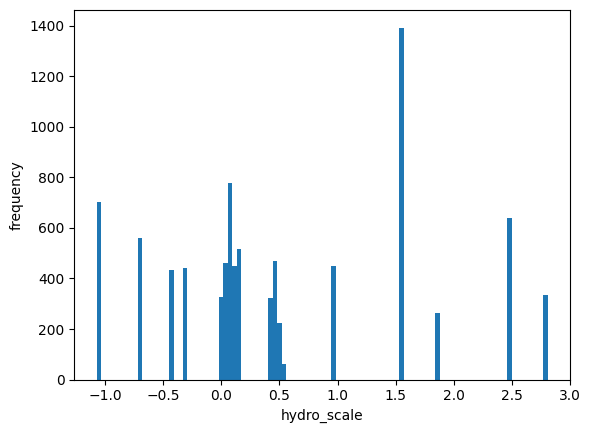

In [72]:
plot_hist('hydro_scale', '1HM5_hydro_no_sasa')

In [10]:
cmd.copy('1HM5_hydro_sasa', '1HM5')
set_hydro_color_v2(
    with_sasa=True, 
    selection='1HM5_hydro_sasa',
    level='R'
    )

In [57]:
save_png('1HM5_hydro_sasa')

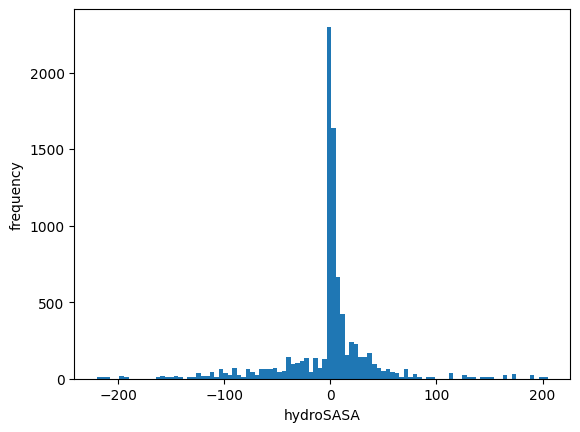

In [19]:
plot_hist('hydroSASA', '1HM5_hydro_sasa')

In [12]:
cmd.copy('1HM5_hydro_sasa_limited', '1HM5')
maximum=36.6 * 4.5
minimum=-36.6 * 4.5
set_hydro_color_v2(
    with_sasa=True, 
    selection='1HM5_hydro_sasa_limited',
    maximum=maximum,
    minimum=minimum,
    level='R'
    )

In [58]:
save_png('1HM5_hydro_sasa_limited')

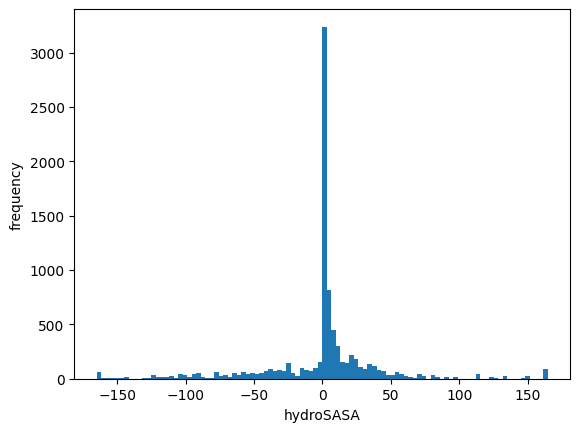

In [20]:
plot_hist('hydroSASA', '1HM5_hydro_sasa_limited', minimum, maximum)

In [14]:
cmd.get('solvent_radius')

'1.40000'

In [59]:
from gcszhn_plugin.pdb.sasa import set_sasa_color
cmd.copy('1HM5_sasa', '1HM5')
set_sasa_color(
    selection="1HM5_sasa",
    level='R'
)

In [60]:
save_png('1HM5_sasa')

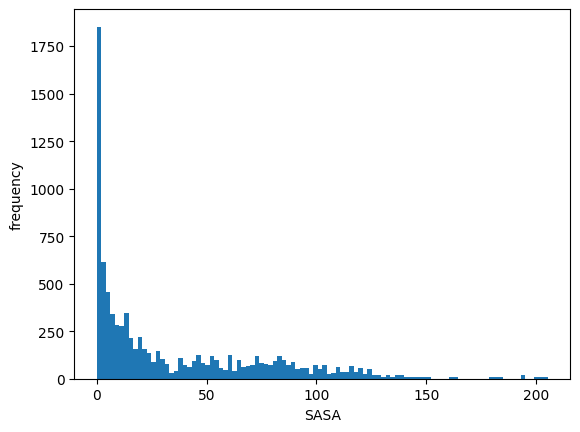

In [26]:
plot_hist('SASA', '1HM5_sasa')

In [62]:
cmd.copy('1HM5_sasa_limited', '1HM5')
set_sasa_color(
    selection="1HM5_sasa_limited",
    level='R',
    minimum=0.0,
    maximum=73.2
)

In [63]:
save_png('1HM5_sasa_limited')

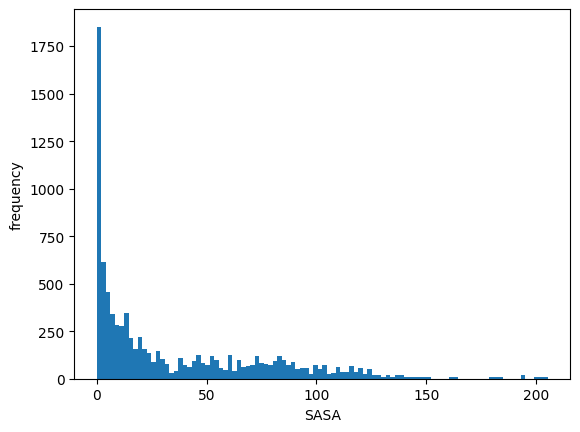

In [24]:
plot_hist('SASA', '1HM5_sasa_limited')

In [65]:
show_only()

In [8]:
cmd.copy_to('hydration_water', 'byres (resn HOH) within 2.8 of (1HM5 and elem N+O)')

In [4]:
cmd.copy('1HM5_hydration', '1HM5')
set_hydration_color('1HM5_hydration')

In [ ]:
save_png('1HM5_hydration')

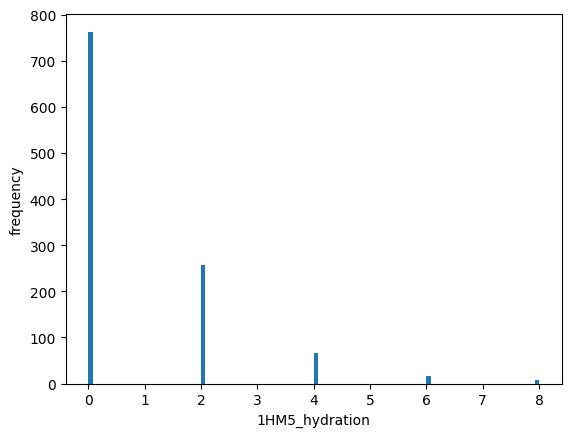

In [7]:
plot_hist('1HM5_hydration', '1HM5_hydration and name CA')

In [18]:
cmd.save('1HM5.pse')